# Testing

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from numpy.linalg import norm
import cv2
from skimage.io import imread
import pickle as pkl

In [22]:
#Resnet50 Model
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
model.trainable = False
model = tf.keras.models.Sequential([model, GlobalMaxPool2D()])

In [23]:
#loading the pickled files
image_features = pkl.load(open('features.pkl', 'rb'))
filenames = pkl.load(open('images.pkl', 'rb'))

In [24]:
from sklearn.neighbors import NearestNeighbors
from PIL import Image as PILImage, ImageTk
import tkinter as tk

In [25]:
#using Nearest Neighbors
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors = 5, algorithm = 'brute', metric = 'euclidean')
neighbors.fit(image_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [26]:
def extracting_features_from_images(image_path, model):
    # Loading with the target size 
    img = image.load_img(image_path, target_size=(224, 224))
    
    # Converting to a numpy array
    img_array = image.img_to_array(img)
    
    # Expanding dimensions to match the model's input shape (batch size of 1)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    
    # Preprocessing the image
    img_preprocess = preprocess_input(img_expand_dim)
    
    # Predicting features using the model and flattening the result
    result = model.predict(img_preprocess).flatten()
    
    # Normalizing the result vector
    norm_result = result / norm(result)
    
    # Returning the normalized feature vector
    return norm_result

In [27]:
#generating recommendation
def get_image_recommendations(image_path, model, neighbors, filenames):
    input_image = extracting_features_from_images(image_path, model)
    distance, indices = neighbors.kneighbors([input_image])
    
    return distance,indices

In [28]:
distance,indices=get_image_recommendations('images (1).jfif', model, neighbors, filenames)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


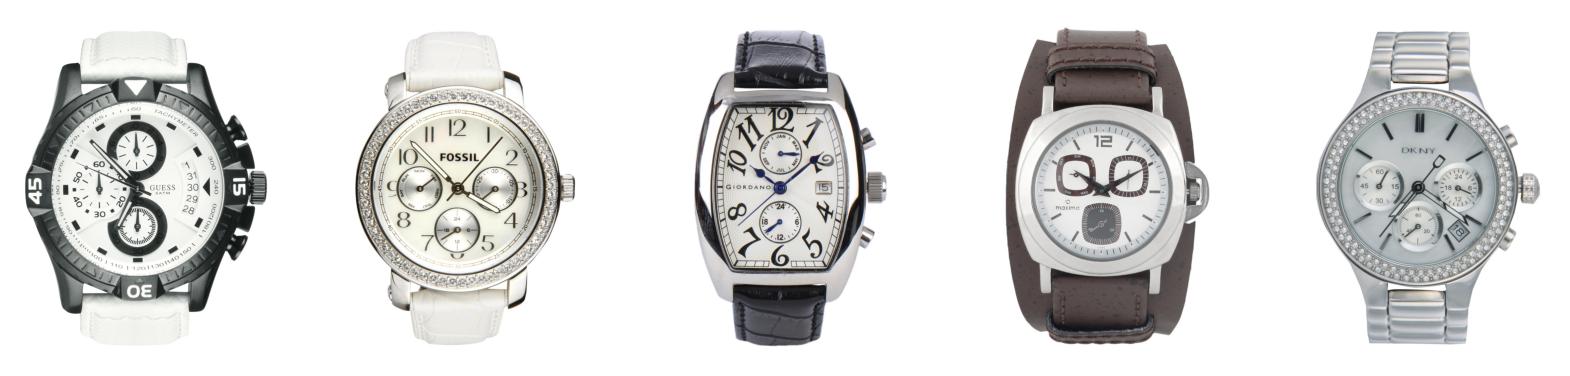

In [29]:
#plotting the recommendations
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    img = imread(filenames[indices[0][i]])
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()